In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import pickle
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.2.0
sys.version_info(major=3, minor=6, micro=4, releaselevel='final', serial=0)
matplotlib 2.1.2
numpy 1.19.1
pandas 0.22.0
sklearn 0.19.1
tensorflow 2.2.0
tensorflow.keras 2.3.0-tf


In [2]:
# 从本地保存数据文件加载数据
with open(file='data/california_housing.pkl', mode='rb') as f:
    housing=pickle.load(f)
# from sklearn.datasets import fetch_california_housing
# housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# 此处采用fit_transform是因为，该函数可以将训练集的均值和方差记录下来，这样在验证集和测试集可以保持一致，这样也就保证了数据是同分布的，模型的构建和训练才会有效
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [8]:
# 手动实现学习率的超参数搜索
# learning_rate: [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
# 学习率在梯度更新中的作用部分：W = W + grad * learning_rate

learning_rates = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
histories = []
for lr in learning_rates:
    model = keras.models.Sequential([
        keras.layers.Dense(30, activation='relu',
                          input_shape=x_train.shape[1:]),
        keras.layers.Dense(1),
    ])
    optimizer = keras.optimizers.SGD(lr)
    model.compile(loss="mean_squared_error", optimizer=optimizer)
    callbacks = [keras.callbacks.EarlyStopping(
        patience=5, min_delta=1e-2)]
    history = model.fit(x_train_scaled, y_train,
                       validation_data = (x_valid_scaled, y_valid),
                       epochs = 100,
                       callbacks = callbacks)
    histories.append(history)

Epoch 1/100
363/363 [==============================] - 1s 4ms/step - loss: 4.6029 - val_loss: 3.8958
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 3.0756 - val_loss: 2.6809
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 2.1854 - val_loss: 1.9770
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 1.6644 - val_loss: 1.5667
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 1.3547 - val_loss: 1.3227
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 1.1673 - val_loss: 1.1757
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 1.0508 - val_loss: 1.0835
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.9748 - val_loss: 1.0221
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.9229 - val_loss: 0.9794
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.8857 - val_lo

363/363 [==============================] - 1s 3ms/step - loss: 0.5681 - val_loss: 0.6197
Epoch 82/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5663 - val_loss: 0.6176
Epoch 83/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5644 - val_loss: 0.6155
Epoch 84/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5626 - val_loss: 0.6134
Epoch 85/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5608 - val_loss: 0.6114
Epoch 86/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5590 - val_loss: 0.6094
Epoch 87/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5573 - val_loss: 0.6074
Epoch 88/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5555 - val_loss: 0.6054
Epoch 89/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5538 - val_loss: 0.6035
Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 4.3115 - val_loss: 2

363/363 [==============================] - 1s 3ms/step - loss: 0.4763 - val_loss: 0.5057
Epoch 19/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4718 - val_loss: 0.5010
Epoch 20/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4679 - val_loss: 0.4942
Epoch 21/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4643 - val_loss: 0.4948
Epoch 22/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4607 - val_loss: 0.4874
Epoch 23/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4577 - val_loss: 0.4837
Epoch 24/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4546 - val_loss: 0.4803
Epoch 25/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4518 - val_loss: 0.4782
Epoch 26/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4490 - val_loss: 0.4739
Epoch 27/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4464 - val_loss: 

learning rate:  0.0001


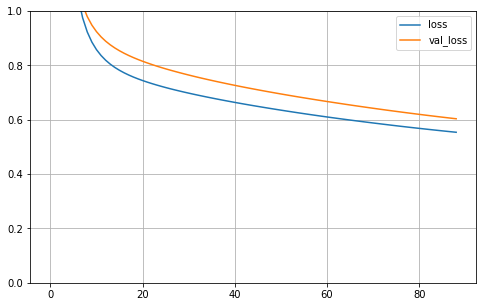

learning rate:  0.0003


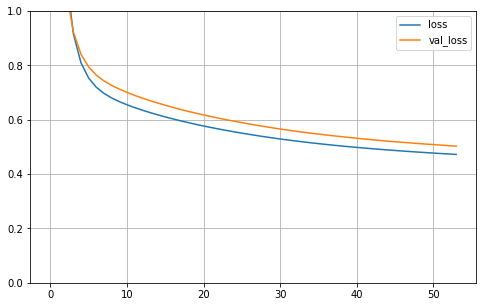

learning rate:  0.001


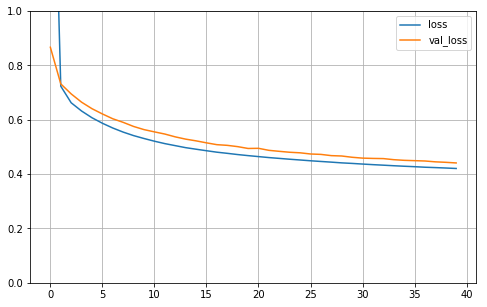

learning rate:  0.003


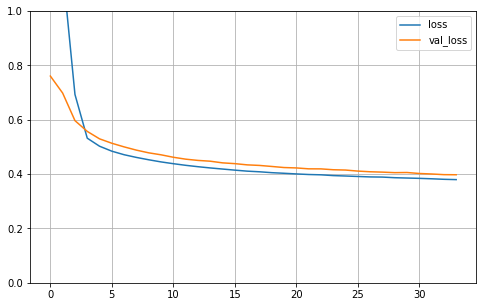

learning rate:  0.01


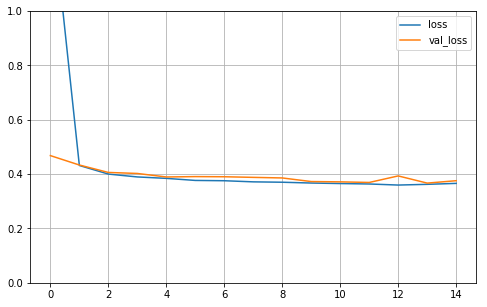

learning rate:  0.03


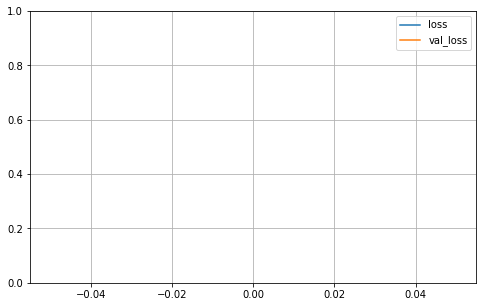

In [9]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

for lr, history in zip(learning_rates, histories):
    print("learning rate: ", lr)
    plot_learning_curves(history)